# OkCupid Project

First and foremost some data analysis, and visualization are needed to get an overview of the topic. There are three parts of this analysis. 
* Firstly **Logistic Regression (LR)** is going to be used. For this part, highest achieved education is going to be the label variable, and other interesting variables like if a person has ever used drug, or how often a person drinks and some other relevant ones are going to be features. Two scenarios will be tested in terms of label variable, firstly multi classification model, including _Undergraduate_, _Phd_, _Master_, _Highschool_ as labels. Secondly there will be a binary classification, as labels being _Undergraduate_, _Not undergraduate_, this analysis reveals whether a person tends to have unique attribution during undergraduate studying.
* Secondly **Principle Component Analysis (PCA)** will be compared to the above mentioned Logistic Regressions. This gives us an idea of how important each selected feature.
* **Thirdly Neural Network (NN)** is going to be performed on each candidate's essay. The goal of this analysis is to be able predict the gender of a specific person by the words used in essay.

### Importing necessary libraries:

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, gcf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import warnings
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.dummy import DummyClassifier

## Inspecting data

Reading `profiles.csv` into a variable by using `read_csv` function from pandas:

In [215]:
df = pd.read_csv('profiles.csv')

Inspecting the dataframe to get an idea of what is feasable with the dataset, and to be able to think about how to alter some columns to fit the requirements for some Machine Learning Models.

In [216]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [217]:
df_col = df.columns
df_col_type = df.dtypes
df_col_type.head()

age           int64
body_type    object
diet         object
drinks       object
drugs        object
dtype: object

As it can be seen most of the columns are object data types, which makes it harder to deal with LR and PCA models, which require quantitative data rather than qualitative.

Interpretation of the columns:
>`age` - the age of a candidate<br>

>`body_type` - reflects fitness of a candidate<br>

>`diet` - includes if a candidate has some habit in terms of eating e.g. vegan<br>

>`drinks` - informs about candidate alcohol drinking routine<br>

>`drugs` - tells if a candidate ever smoked a green<br>

>`education` - informtion about study level of a candidate<br>

>`essay` - personal introduction of a candidate, includes `essay0` to `essay9`<br>

>`ethnicity` - reflects which ethnicity a candidate belongs to<br>

>`height` - height of a candidate in feet<br>

>`income` - wage of a candidate<br>

>`job` - occupation of a candidate<br>

>`last_online` - information about a candidate last active time on the webpage<br>

>`location` - informs about location of a candidate<br>

>`offspring` - 

Getting a specific column's dtype given by its name:

In [218]:
user_input = 'pets' #input('Column name that you are interested in what type it has: ').lower()

In [219]:
df_col_type_dict = {key:value for (key, value) in zip(df_col, df_col_type)}
print(f"{user_input} column's dtype is: {df_col_type_dict[user_input]}")

pets column's dtype is: object


## Cleaning data

Because the id of a candidate is a unique id of the dataframe, therefore it is assumed that observation is independent, which is required for most of the ML models.

Dropping NaN values from the dataframe, since ML models are only working well for a dataset without missing values.

In [220]:
df.dropna(inplace=True)

Checking whether the above code ran well:

In [221]:
print(f"Unique values in education column: {np.unique(df.education)}")

Unique values in education column: ['college/university' 'dropped out of college/university'
 'dropped out of high school' 'dropped out of law school'
 'dropped out of masters program' 'dropped out of ph.d program'
 'dropped out of space camp' 'dropped out of two-year college'
 'graduated from college/university' 'graduated from high school'
 'graduated from law school' 'graduated from masters program'
 'graduated from med school' 'graduated from ph.d program'
 'graduated from space camp' 'graduated from two-year college'
 'high school' 'masters program' 'space camp' 'two-year college'
 'working on college/university' 'working on high school'
 'working on law school' 'working on masters program'
 'working on med school' 'working on ph.d program' 'working on space camp'
 'working on two-year college']


### Cleaning data for multi classification Logistic Regression

Inspecting the distribution of different classes in the education column:

In [222]:
df.education.value_counts().head(5)

graduated from college/university    1739
graduated from masters program        699
working on college/university         572
graduated from two-year college       184
graduated from high school            170
Name: education, dtype: int64

Creating a `highest_education` column to the dataframe, which includes _Undergraduate_, _Highschool_, _Master_, _Phd_ values.

In [223]:
def group_education(s):
    description = s['education']
    if ('graduate' in description) & ('college' in description):
        return 'undergraduate'
    elif ('work' in description) & ('college' in description):
        return 'highschool'
    elif ('graduate' in description) & ('master' in description):
        return 'master'
    elif ('graduate' in description) & ('high' in description):
        return 'highschool'
    elif ('work' in description) & ('master' in description):
        return 'undergraduate'
    elif ('drop' in description) & ('college' in description):
        return 'highschool'
    elif ('graduate' in description) & ('ph.d' in description):
        return 'phd'
    elif ('graduate' in description) & ('law' in description):
        return 'undergraduate'
    elif ('work' in description) & ('ph.d' in description):
        return 'master'
    elif ('graduate' in description) & ('master' in description):
        return 'master'
    elif ('graduate' in description) & ('med' in description):
        return 'phd'
    elif ('work' in description) & ('law' in description):
        return 'highschool'
    elif ('drop' in description) & ('master' in description):
        return 'undergraduate'
    elif ('drop' in description) & ('ph.d' in description):
        return 'master'
    elif 'college':
        return 'undergraduate'
    elif 'high school':
        return 'highschool'
    elif 'masters':
        return 'master'
    else:
        return np.nan

df['highest_education'] = df.apply(group_education, axis=1)

In [224]:
print(f'The length of dataframe before cleaning up: {len(df)}')

The length of dataframe before cleaning up: 4407


Since not all of the education description has been dealt with, e.g.: _space camp_ type has been omitted due to low occurrence. Dropping NaN values is needed to move forward.

In [225]:
df.highest_education.dropna(inplace=True)

Distribution of the sorted highest_education values:

In [226]:
df.highest_education.value_counts()

undergraduate    2464
highschool       1035
master            771
phd               137
Name: highest_education, dtype: int64

_Diet_, _drinks_, _drugs_, _job_, _smokes_, _ethnicity_ columns' unique values are shown here, for the sake of a basic understanding of these columns' meaning.

In [227]:
df.diet.unique()

array(['strictly anything', 'mostly anything', 'anything', 'mostly other',
       'other', 'mostly vegetarian', 'vegan', 'vegetarian',
       'mostly kosher', 'mostly vegan', 'strictly vegetarian',
       'strictly vegan', 'strictly other', 'mostly halal',
       'strictly kosher', 'strictly halal', 'kosher'], dtype=object)

In [228]:
df.drinks.unique()

array(['socially', 'rarely', 'often', 'not at all', 'very often',
       'desperately'], dtype=object)

In [229]:
df.drugs.unique()

array(['never', 'sometimes', 'often'], dtype=object)

Since there are so many different values in _ethnicity_, it has been reduced to only contain those values, which occured 10 or more than 10 times.

In [230]:
df = df.groupby('ethnicity').filter(lambda x : (x['ethnicity'].count()>=10).any())

In [231]:
df.ethnicity.unique()

array(['asian, white', 'white', 'asian', 'hispanic / latin, white',
       'hispanic / latin', 'indian', 'native american, white', 'other',
       'asian, pacific islander', 'white, other',
       'native american, white, other', 'pacific islander', 'black',
       'middle eastern', 'black, hispanic / latin', 'black, white',
       'middle eastern, white', 'black, native american, white',
       'black, other', 'hispanic / latin, white, other',
       'pacific islander, white', 'hispanic / latin, other',
       'black, native american',
       'native american, hispanic / latin, white'], dtype=object)

In [232]:
df.job.unique()

array(['transportation', 'science / tech / engineering',
       'executive / management', 'artistic / musical / writer',
       'unemployed', 'medicine / health', 'sales / marketing / biz dev',
       'computer / hardware / software', 'entertainment / media',
       'banking / financial / real estate', 'student',
       'clerical / administrative', 'other',
       'construction / craftsmanship', 'education / academia', 'military',
       'law / legal services', 'political / government', 'rather not say',
       'hospitality / travel', 'retired'], dtype=object)

In [233]:
df.smokes.unique()

array(['sometimes', 'no', 'trying to quit', 'when drinking', 'yes'],
      dtype=object)

In [234]:
print(f'After cleaning up, the df has {len(df)} rows.')

After cleaning up, the df has 4228 rows.


### Cleaning data for binary Logistic Regression

In [235]:
def group_education_binary(s):
    description = s['highest_education']
    if 'undergraduate' in description:
        return 1
    else:
        return 0

df['highest_education_binary'] = df.apply(group_education_binary, axis=1)

In [236]:
df.highest_education_binary.value_counts()

1    2371
0    1857
Name: highest_education_binary, dtype: int64

## Analysing LogisticRegression

In [237]:
selected_cols = ['highest_education', 'diet', 'drinks', 'drugs', 'ethnicity', 'job', 'smokes']
df_LR = df[selected_cols]

At a maximum, there should be no more than the smallest class size divided by the number of features.

In [238]:
max_features = min(df.highest_education.value_counts()//(len(selected_cols)- 1))
print(f'Maximum features limit: {max_features}')

Maximum features limit: 22


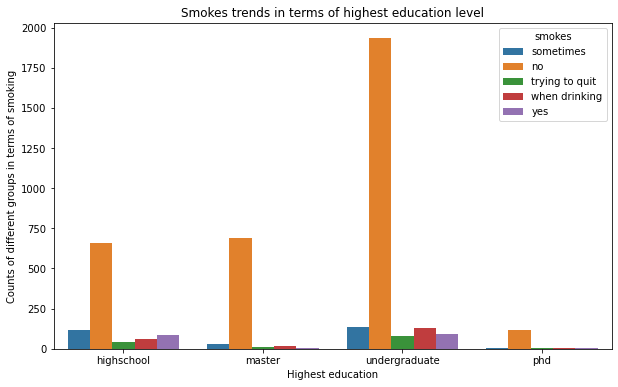

In [239]:
fig = gcf()
fig.set_size_inches(10, 6)
sns.countplot(data=df_LR, x='highest_education', hue='smokes')
plt.title('Smokes trends in terms of highest education level')
plt.xlabel('Highest education')
plt.ylabel('Counts of different groups in terms of smoking')
plt.show()
plt.close()

> DESCRIPTION OF THE GRAPH IS NEEDED

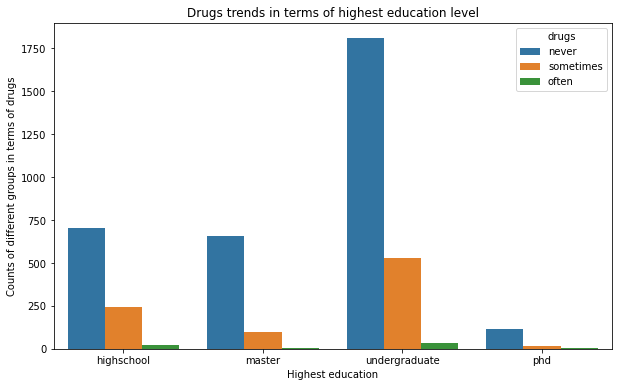

In [240]:
fig = gcf()
fig.set_size_inches(10, 6)
sns.countplot(data=df_LR, x='highest_education', hue='drugs')
plt.title('Drugs trends in terms of highest education level')
plt.xlabel('Highest education')
plt.ylabel('Counts of different groups in terms of drugs')
plt.show()
plt.close()

> DESCRIPTION OF THE GRAPH IS NEEDED

## Multi classification Logistic Regression Model

### Model without taking into consideration class imbalance

Creating quantitative values from qualitative ones, by using pandas `get_dummies` function for each feature that is selected before:

In [241]:
for col in selected_cols[1:]:
    df_LR = pd.get_dummies(df_LR, columns=[col], prefix = [col])

**Among classes imbalance** can be observed, therefore it is needed to take into consideration. This aspect is solved by using model weighting methods, but firstly model is fitted without noting class imbalance. In addition it is a kind of multi classification problem, since the feature column has more than 2 options to choose from.

In [242]:
df_LR.highest_education.value_counts()

undergraduate    2371
highschool        969
master            754
phd               134
Name: highest_education, dtype: int64

Labels and features are selected:

In [243]:
labels = df_LR.iloc[:, 1:len(df_LR.columns)]
feature = df_LR['highest_education']

Splitting data into a train and test sets, shapes needs to be altered to fit to the LR model:

In [244]:
X_train, X_test, Y_train, Y_test = train_test_split(labels, feature, test_size=.3, random_state = 0)

Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

LR model is created and fitted with the train dataset, as well as test set is predicted by the fitted LR model.

In [245]:
lr_model = LogisticRegression(multi_class="multinomial", max_iter=1000).fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_test)

Important evaluation metrics is shown below, including _accuracy_, _precision_, _recall_, _f1-score_:

In [246]:
warnings.filterwarnings('ignore')
print(classification_report(Y_test, lr_predictions))

               precision    recall  f1-score   support

   highschool       0.61      0.41      0.49       280
       master       0.35      0.11      0.17       240
          phd       0.17      0.03      0.05        38
undergraduate       0.62      0.87      0.73       711

     accuracy                           0.60      1269
    macro avg       0.44      0.35      0.36      1269
 weighted avg       0.55      0.60      0.55      1269



\begin{equation*}
accuracy   = \frac{TP + TN}{TP + TN + FP + FN}
\end{equation*}

\begin{equation*}
precision   = \frac{TP}{TP + FP}
\end{equation*}

\begin{equation*}
recall   = \frac{TP}{TP + FN}
\end{equation*}

\begin{equation*}
f1-score   = \frac{2 * precision * recall}{precision + recall}
\end{equation*}

Normalized confusion matrix is created:

In [247]:
cm = confusion_matrix(Y_test, lr_predictions, normalize='true')

In [248]:
cm_labels = np.unique(Y_test)
cm_df = pd.DataFrame(cm, index=cm_labels, columns=cm_labels)

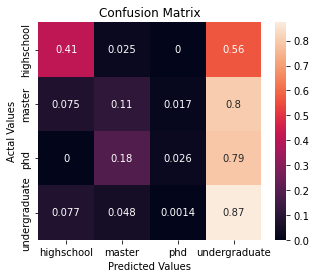

In [249]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Using model weighting method

Three functions have been created to easily reuse models. `make_classification` splits data into train and test set, and creates a Logistic Regression model, and fits it with the mentioned data, in addition it returns a tuple of the actual and predicted values. `make_cm` function evaluates and gives a labeled confusion matrix, whereas `evaluation_metrics` gives us some evaulation metrics such as accuracy, recall and so on.

In [250]:
def make_classification(l, f, t_size, iteration,  multi_class='auto', class_weight='None', oversampling=False):
    if oversampling:
        ros = RandomOverSampler(sampling_strategy='not majority')
        X_over, Y_over = ros.fit_resample(l, f)
        X_train, X_test, Y_train, Y_test = train_test_split(X_over, Y_over, test_size=t_size, random_state = 0)
    else:  
        X_train, X_test, Y_train, Y_test = train_test_split(l, f, test_size=t_size, random_state = 0)
    Y_train = Y_train.to_numpy().ravel()
    Y_test = Y_test.to_numpy().ravel()
    lr_model = LogisticRegression(multi_class=multi_class, max_iter=iteration, class_weight=class_weight).fit(X_train, Y_train)
    lr_predictions = lr_model.predict(X_test)
    pred_prob = lr_model.predict_proba(X_test)
    return (Y_test, lr_predictions, pred_prob, X_train, Y_train, X_test)

def make_cm(actual, prediction, is_normalized):
    cm = confusion_matrix(actual, prediction, normalize=is_normalized)
    cm_df = pd.DataFrame(cm, index=np.unique(actual), columns=np.unique(actual))
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

def evaluation_metrics(actual, prediction):
    warnings.filterwarnings('ignore')
    print(classification_report(actual, prediction))
    
def make_roc_curve(actual, pred_prob, X_train, Y_train, X_test):
    fpr, tpr, thresholds = roc_curve(actual, pred_prob[:,1])
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve')

    idx = list(range(len(thresholds)))[1::100]
    for i in idx:
        plt.text(fpr[i], tpr[i]+ 0.09, thresholds[i].round(2))

    clf = DummyClassifier(strategy='most_frequent', random_state=0)
    clf.fit(X_train, Y_train)
    roc_auc = roc_auc_score(actual, clf.predict_proba(X_test)[:,1] )
    fpr, tpr, thresholds = roc_curve(actual, clf.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, color='navy',linestyle='--', label='Dummy Classifier (most frequent) \n (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid()
    plt.legend(loc="lower right")
    plt.show()

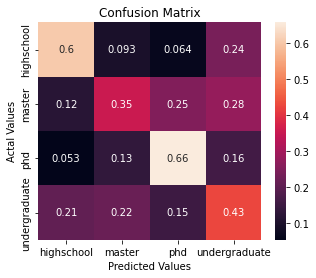

In [251]:
(actual, prediction, pred_prob, X_train, Y_train, X_test) = make_classification(labels, feature, .3, 1000, multi_class='multinomial', class_weight='balanced')
make_cm(actual, prediction, 'true')

In [252]:
evaluation_metrics(actual, prediction)

               precision    recall  f1-score   support

   highschool       0.49      0.60      0.54       280
       master       0.31      0.35      0.33       240
          phd       0.12      0.66      0.20        38
undergraduate       0.68      0.43      0.53       711

     accuracy                           0.46      1269
    macro avg       0.40      0.51      0.40      1269
 weighted avg       0.55      0.46      0.48      1269



As it can be seen with model weighting, our model tends to predict better each classes of `highest_education`, evaluation metrics has been balanced for each of the classes.

## Binary classification Logistic Regression Model

### Using model weighting method

In [253]:
feature = df['highest_education_binary']

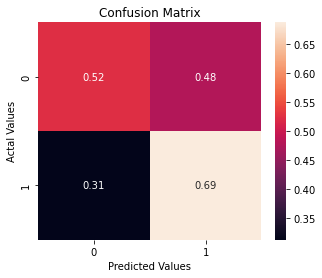

In [254]:
(actual, prediction, pred_prob, X_train, Y_train, X_test) = make_classification(labels, feature, .3, 1000, class_weight='balanced')
make_cm(actual, prediction, 'true')

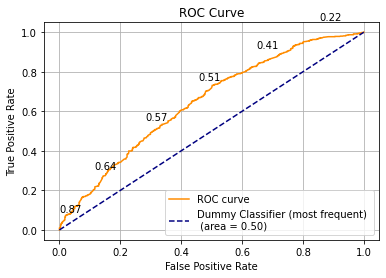

In [255]:
make_roc_curve(actual, pred_prob, X_train, Y_train, X_test)

In [256]:
roc_auc = roc_auc_score(actual, pred_prob[:,1])
print(f'ROC AUC score: {round(roc_auc, 2)}')

ROC AUC score: 0.65


In [257]:
evaluation_metrics(actual, prediction)

              precision    recall  f1-score   support

           0       0.57      0.52      0.54       558
           1       0.65      0.69      0.67       711

    accuracy                           0.62      1269
   macro avg       0.61      0.61      0.61      1269
weighted avg       0.61      0.62      0.61      1269



### Using oversampling method

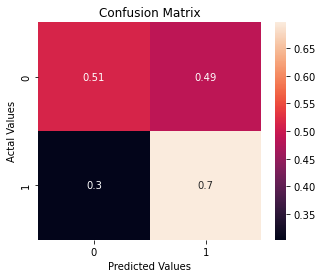

In [258]:
(actual, prediction, pred_prob, X_train, Y_train, X_test) = make_classification(labels, feature, .3, 1000, oversampling=True)
make_cm(actual, prediction, 'true')

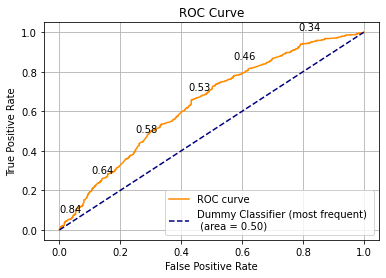

In [259]:
make_roc_curve(actual, pred_prob, X_train, Y_train, X_test)

In [260]:
roc_auc = roc_auc_score(actual, pred_prob[:,1])
print(f'ROC AUC score: {round(roc_auc, 2)}')

ROC AUC score: 0.64


In [261]:
evaluation_metrics(actual, prediction)

              precision    recall  f1-score   support

           0       0.62      0.51      0.56       695
           1       0.60      0.70      0.64       728

    accuracy                           0.61      1423
   macro avg       0.61      0.61      0.60      1423
weighted avg       0.61      0.61      0.60      1423

